## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request

## Datos

In [ ]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("/data/train.csv")

## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [4]:
df.head()

laptop_ID Company        Product   TypeName  Inches   ScreenResolution   
0        755      HP         250 G6   Notebook    15.6  Full HD 1920x1080  \
1        618    Dell  Inspiron 7559     Gaming    15.6  Full HD 1920x1080   
2        909      HP    ProBook 450   Notebook    15.6  Full HD 1920x1080   
3          2   Apple    Macbook Air  Ultrabook    13.3           1440x900   
4        286    Dell  Inspiron 3567   Notebook    15.6  Full HD 1920x1080   

                           Cpu   Ram               Memory   
0     Intel Core i3 6006U 2GHz   8GB            256GB SSD  \
1  Intel Core i7 6700HQ 2.6GHz  16GB              1TB HDD   
2   Intel Core i7 7500U 2.7GHz   8GB              1TB HDD   
3         Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
4   Intel Core i3 6006U 2.0GHz   4GB              1TB HDD   

                              Gpu       OpSys  Weight  Price_in_euros  
0           Intel HD Graphics 520  Windows 10  1.86kg          539.00  
1  Nvidia GeForce GTX 960<U+039C>  Windows 10  2.59kg          879.01  
2            Nvidia GeForce 930MX  Windows 10  2.04kg          900.00  
3          Intel HD Graphics 6000       macOS  1.34kg          898.94  
4              AMD Radeon R5 M430       Linux  2.25kg          428.00

In [ ]:
df.tail()

In [ ]:
df.describe()

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [6]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(73363, 11)

In [ ]:
X.shape

In [7]:
y.shape

(73363,)

### 2. Dividir X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [15]:
X_train

id   Company                                    Product  \
25    748      Dell                              Latitude 5480   
84   1011        HP                              EliteBook 820   
10   1002      Dell                                Vostro 3568   
342   746   Samsung                                 Notebook 9   
890   575  Mediacom                              SmartBook 141   
..    ...       ...                                        ...   
106   397    Lenovo                              ThinkPad L470   
270   714      Dell                              Latitude 5580   
860    85      Dell                              Inspiron 7577   
435   812   Samsung                                 Notebook 9   
102   628      Asus  Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)   

               TypeName  Inches                 ScreenResolution  \
25             Notebook    14.0                         1366x768   
84            Ultrabook    12.5                Full HD 1920x1080   
10             Notebook    15.6                         1366x768   
342           Ultrabook    13.3                Full HD 1920x1080   
890            Notebook    14.0                Full HD 1920x1080   
..                  ...     ...                              ...   
106            Notebook    14.0      IPS Panel Full HD 1920x1080   
270            Notebook    15.6                Full HD 1920x1080   
860              Gaming    15.6      IPS Panel Full HD 1920x1080   
435           Ultrabook    13.3                Full HD 1920x1080   
102  2 in 1 Convertible    13.3  Full HD / Touchscreen 1920x1080   

                             Cpu   Ram                Memory  \
25    Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   
84    Intel Core i5 7200U 2.5GHz   4GB             500GB HDD   
10    Intel Core i3 7100U 2.4GHz   4GB             128GB SSD   
342   Intel Core i7 7500U 2.7GHz  16GB             256GB SSD   
890  Intel Atom x5-Z8350 1.44GHz   4GB              32GB SSD   
..                           ...   ...                   ...   
106   Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   
270   Intel Core i5 7300U 2.6GHz  16GB             512GB SSD   
860  Intel Core i7 7700HQ 2.8GHz  16GB  128GB SSD +  1TB HDD   
435   Intel Core i5 7200U 2.5GHz   8GB             256GB SSD   
102   Intel Core i5 7200U 2.5GHz   6GB               1TB HDD   

                            Gpu       OpSys  Weight  
25        Intel HD Graphics 620  Windows 10   1.6kg  
84        Intel HD Graphics 620  Windows 10  1.26kg  
10        Intel HD Graphics 620  Windows 10  2.18kg  
342       Intel HD Graphics 620  Windows 10  0.81kg  
890           Intel HD Graphics  Windows 10   1.4kg  
..                          ...         ...     ...  
106       Intel HD Graphics 620  Windows 10   1.9kg  
270       Intel HD Graphics 620  Windows 10  1.93kg  
860  Nvidia GeForce GTX 1050 Ti  Windows 10  2.65kg  
435       Intel HD Graphics 620  Windows 10  0.81kg  
102       Intel HD Graphics 620  Windows 10   1.5kg  

[729 rows x 12 columns]

In [ ]:
y_train

### 3. Baseline de modelos


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

Company              Product   TypeName  Inches  \
id                                                     
1184      HP  Pavilion 15-BC000nv   Notebook    15.6   
815   Lenovo       Thinkpad T470s  Ultrabook    14.0   
1244      HP        EliteBook 840   Notebook    14.0   
1121      HP          Spectre Pro   Notebook    13.3   
443   Lenovo    IdeaPad 320-15IAP   Notebook    15.6   

                 ScreenResolution                                   Cpu  Ram  \
id                                                                             
1184  IPS Panel Full HD 1920x1080           Intel Core i7 6700HQ 2.6GHz  6GB   
815             Full HD 1920x1080            Intel Core i7 7500U 2.7GHz  8GB   
1244            Full HD 1920x1080            Intel Core i5 6200U 2.3GHz  4GB   
1121            Full HD 1920x1080            Intel Core i5 6200U 2.3GHz  8GB   
443             Full HD 1920x1080  Intel Pentium Quad Core N4200 1.1GHz  4GB   

         Memory                      Gpu       OpSys  Weight  
id                                                            
1184    1TB HDD  Nvidia GeForce GTX 960M  Windows 10  2.18kg  
815   256GB SSD    Intel HD Graphics 620  Windows 10  1.32kg  
1244  256GB SSD    Intel HD Graphics 520   Windows 7  1.54kg  
1121  256GB SSD    Intel HD Graphics 520  Windows 10  1.16kg  
443   128GB SSD    Intel HD Graphics 505  Windows 10   2.2kg

In [19]:
X_pred.tail()

(391, 11)

In [ ]:
X_pred.info()

 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred

In [ ]:
predictions_submit = model.predict(X_pred)
predictions_submit

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

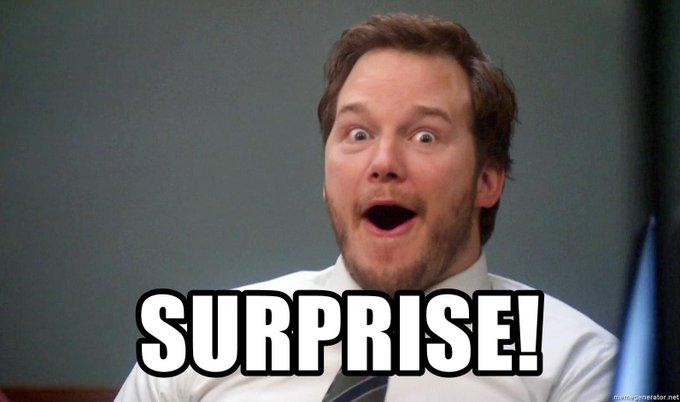

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [23]:
sample = pd.read_csv("data/sample_submission.csv")

In [24]:
sample.head()

id  Price_euros
0  1184         2158
1   815          511
2  1244         5290
3  1121          622
4   443         1140

In [25]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame()

In [27]:
submission.head()

id  Price_euros
0  1184         2158
1   815          511
2  1244         5290
3  1121          622
4   443         1140

In [28]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [31]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [34]:
chequeador(submission)

You're ready to submit!
